# Visualization and Export

Learn how to create publication-quality charts and export results.

This notebook demonstrates:
1. SDK theme for consistent styling
2. Cost over time line charts
3. Failures by year bar charts
4. Risk distribution histograms
5. Scenario comparison charts
6. Asset action heatmap
7. Customizing and combining charts


## Setup

In [1]:
# Core imports
import pandas as pd
import numpy as np
from datetime import date, timedelta
import matplotlib.pyplot as plt

# SDK imports
from asset_optimization import (
    WeibullModel,
    Simulator,
    SimulationConfig,
    Optimizer,
    set_sdk_theme,
    plot_cost_over_time,
    plot_failures_by_year,
    plot_risk_distribution,
    plot_scenario_comparison,
    plot_asset_action_heatmap,
    compare,
)

## 1. Create Sample Data

First, we'll create simulation and optimization results to visualize.

In [2]:
# Generate synthetic portfolio
np.random.seed(42)

n_assets = 500
materials = ['Cast Iron', 'PVC', 'Ductile Iron']

base_date = date(2024, 1, 1)
install_dates = [
    base_date - timedelta(days=int(np.random.uniform(20*365, 80*365)))
    for _ in range(n_assets)
]

data = pd.DataFrame({
    'asset_id': [f'PIPE-{i:04d}' for i in range(n_assets)],
    'install_date': pd.to_datetime(install_dates),
    'asset_type': 'pipe',
    'material': np.random.choice(materials, n_assets, p=[0.4, 0.35, 0.25]),
    'diameter_mm': np.random.choice([150, 200, 300, 400], n_assets),
    'length_m': np.random.uniform(50, 500, n_assets).round(0),
})

portfolio = data
print(portfolio.head())

    asset_id install_date asset_type      material  diameter_mm  length_m
0  PIPE-0000   1981-07-23       pipe           PVC          300     408.0
1  PIPE-0001   1947-01-05       pipe           PVC          400     267.0
2  PIPE-0002   1960-02-16       pipe     Cast Iron          200     103.0
3  PIPE-0003   1968-02-14       pipe  Ductile Iron          400     106.0
4  PIPE-0004   1994-08-30       pipe           PVC          400     359.0


In [3]:
# Create deterioration model
params = {
    'Cast Iron': (3.0, 60),
    'PVC': (2.5, 80),
    'Ductile Iron': (2.8, 70),
}
model = WeibullModel(params)

In [4]:
# Run simulation
config = SimulationConfig(
    n_years=10,
    start_year=2024,
    random_seed=42,
    failure_response='replace',
    )

sim = Simulator(model, config)
sim_result = sim.run(portfolio)
print(sim_result)

SimulationResult(years=2024-2033, total_cost=$7,930,000, failures=122)


In [5]:
sim_result.asset_history

,year,asset_id,age,action,failed,failure_cost,intervention_cost,total_cost
0,2024,PIPE-0000,43.442163,none,False,0.0,0.0,0.0
1,2024,PIPE-0001,77.988364,none,False,0.0,0.0,0.0
2,2024,PIPE-0002,64.874059,none,False,0.0,0.0,0.0
3,2024,PIPE-0003,56.879535,none,False,0.0,0.0,0.0
4,2024,PIPE-0004,30.338809,none,False,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4995,2033,PIPE-0495,2.000000,none,False,0.0,0.0,0.0
4996,2033,PIPE-0496,64.981520,none,False,0.0,0.0,0.0
4997,2033,PIPE-0497,8.000000,none,False,0.0,0.0,0.0
4998,2033,PIPE-0498,88.409309,none,False,0.0,0.0,0.0


In [6]:
# Run optimization
optimizer = Optimizer(strategy='greedy', min_risk_threshold=0.1)
optimizer.fit(portfolio, model, budget=500_000)
opt_result = optimizer.result
print(opt_result)

OptimizationResult(strategy='greedy', selected=100 assets, spent=$500,000, utilization=100.0%)


## 2. SDK Theme

All plots use a consistent professional theme. Call `set_sdk_theme()` once at the start of your notebook.

The theme provides:
- Clean white background with subtle grid
- Professional blue color palette
- Readable fonts and sizes

In [7]:
# Apply SDK theme (call once at notebook start)
set_sdk_theme()
print("SDK theme applied")

SDK theme applied


In [8]:
sim_result.asset_history

,year,asset_id,age,action,failed,failure_cost,intervention_cost,total_cost
0,2024,PIPE-0000,43.442163,none,False,0.0,0.0,0.0
1,2024,PIPE-0001,77.988364,none,False,0.0,0.0,0.0
2,2024,PIPE-0002,64.874059,none,False,0.0,0.0,0.0
3,2024,PIPE-0003,56.879535,none,False,0.0,0.0,0.0
4,2024,PIPE-0004,30.338809,none,False,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4995,2033,PIPE-0495,2.000000,none,False,0.0,0.0,0.0
4996,2033,PIPE-0496,64.981520,none,False,0.0,0.0,0.0
4997,2033,PIPE-0497,8.000000,none,False,0.0,0.0,0.0
4998,2033,PIPE-0498,88.409309,none,False,0.0,0.0,0.0


## 3. Cost Over Time

Line chart showing total cost trajectory over the simulation period.

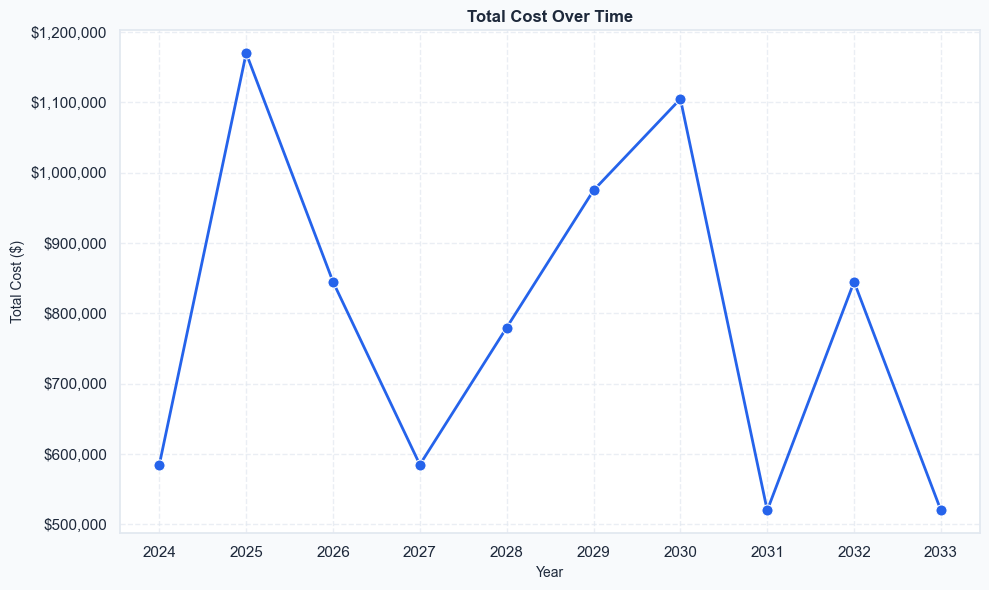

In [9]:
# Basic cost over time chart
ax = plot_cost_over_time(sim_result)
plt.show()

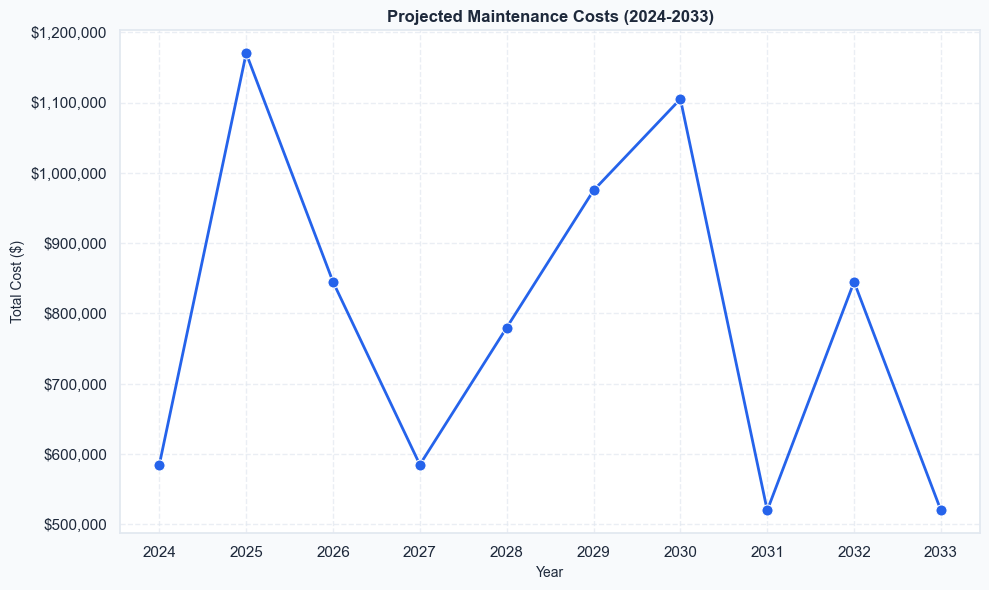

In [10]:
# With custom title
ax = plot_cost_over_time(sim_result, title='Projected Maintenance Costs (2024-2033)')
plt.show()

## 4. Failures by Year

Bar chart showing failure counts per year.

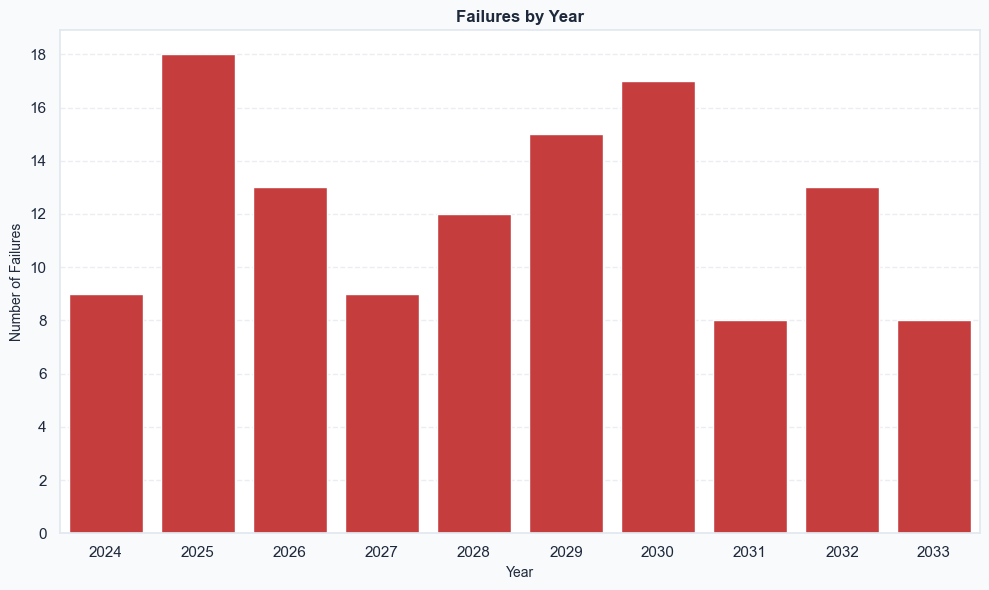

In [11]:
# Basic failures chart
ax = plot_failures_by_year(sim_result)
plt.show()

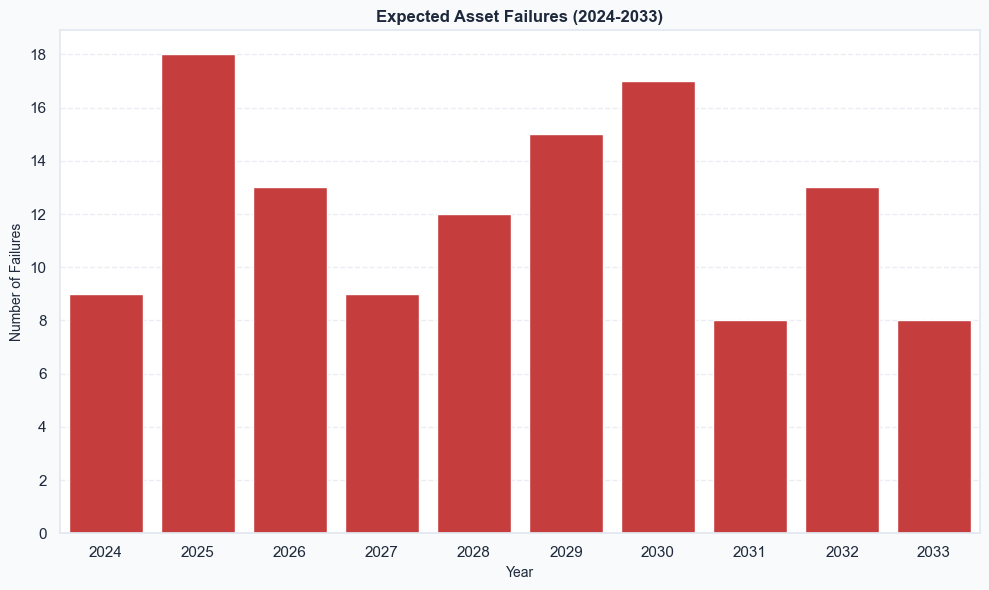

In [12]:
# With custom title
ax = plot_failures_by_year(sim_result, title='Expected Asset Failures (2024-2033)')
plt.show()

## 5. Risk Distribution

Histogram showing the distribution of risk scores for selected interventions.

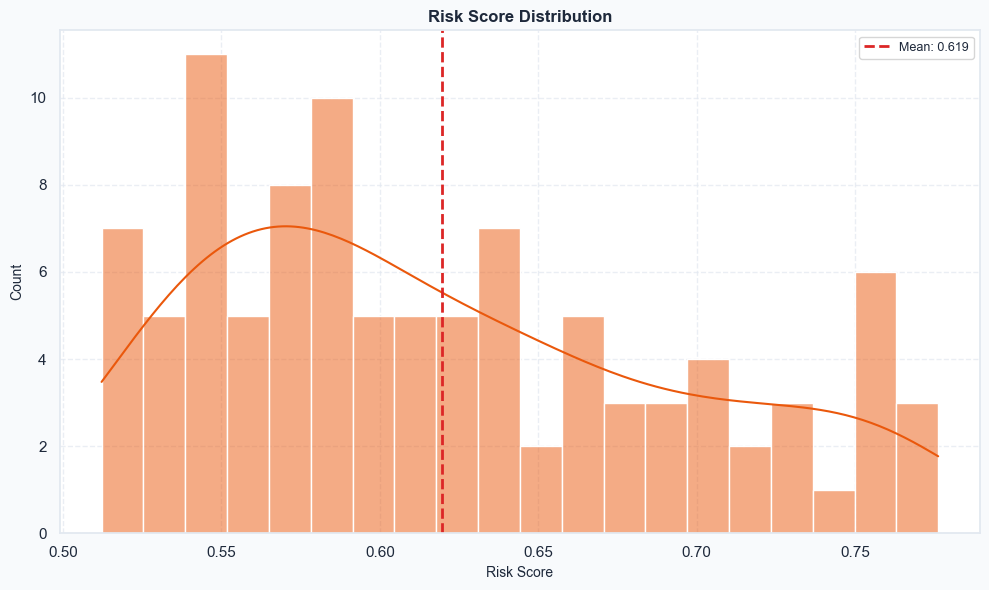

In [13]:
# Risk distribution of selected assets
ax = plot_risk_distribution(opt_result.selections)
plt.show()

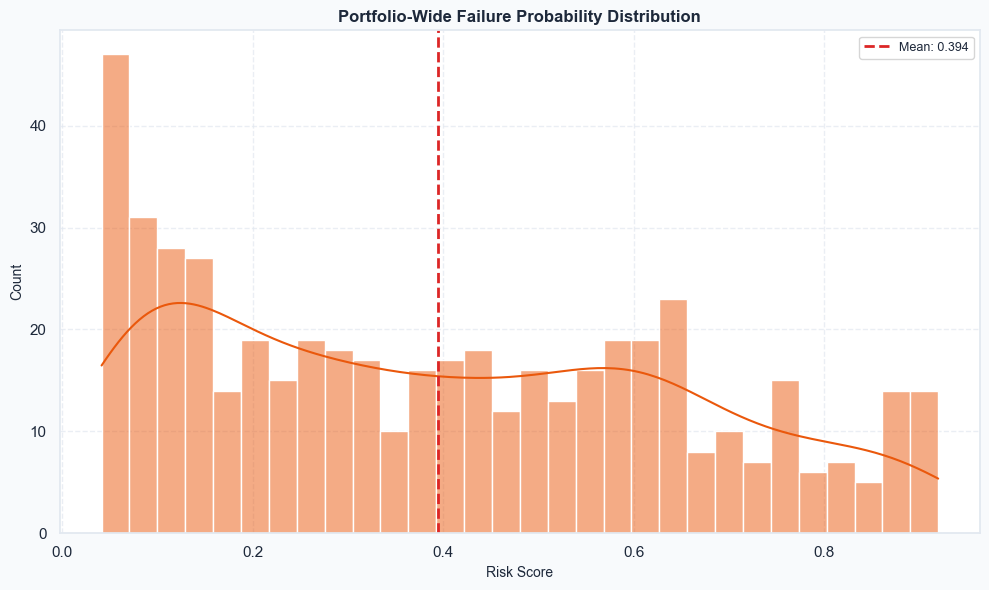

In [14]:
# You can also plot failure probability from portfolio data
# First enrich the portfolio with failure probabilities
portfolio_with_risk = portfolio.copy()
portfolio_with_risk['age'] = (
    (pd.Timestamp.now() - portfolio_with_risk['install_date']).dt.days / 365.25
)
portfolio_enriched = model.transform(portfolio_with_risk)

# Plot with different column name
ax = plot_risk_distribution(
    portfolio_enriched,
    risk_column='failure_probability',
    title='Portfolio-Wide Failure Probability Distribution',
    bins=30,
)
plt.show()

## 6. Scenario Comparison

Compare the optimized scenario against a 'do nothing' baseline.

In [15]:
# Compare simulation result against auto-generated baseline
comparison = compare(sim_result, baseline='do_nothing')

print("Comparison DataFrame:")
comparison.head(10)

Comparison DataFrame:


,scenario,year,metric,value
0,optimized,2024,total_cost,585000.0
1,optimized,2025,total_cost,1170000.0
2,optimized,2026,total_cost,845000.0
3,optimized,2027,total_cost,585000.0
4,optimized,2028,total_cost,780000.0
5,optimized,2029,total_cost,975000.0
6,optimized,2030,total_cost,1105000.0
7,optimized,2031,total_cost,520000.0
8,optimized,2032,total_cost,845000.0
9,optimized,2033,total_cost,520000.0


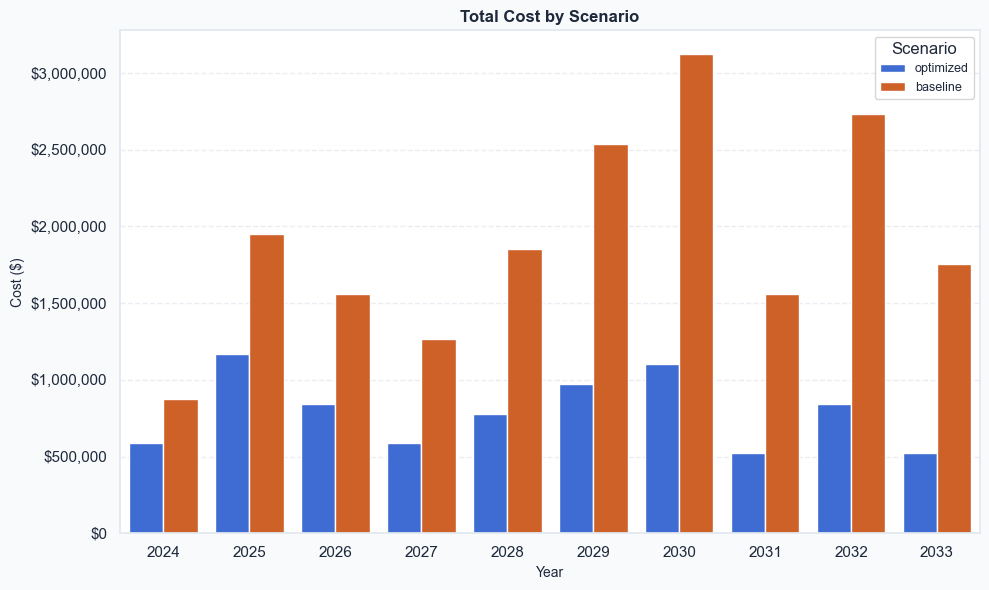

In [16]:
# Plot total cost comparison
ax = plot_scenario_comparison(comparison, metric='total_cost')
plt.show()

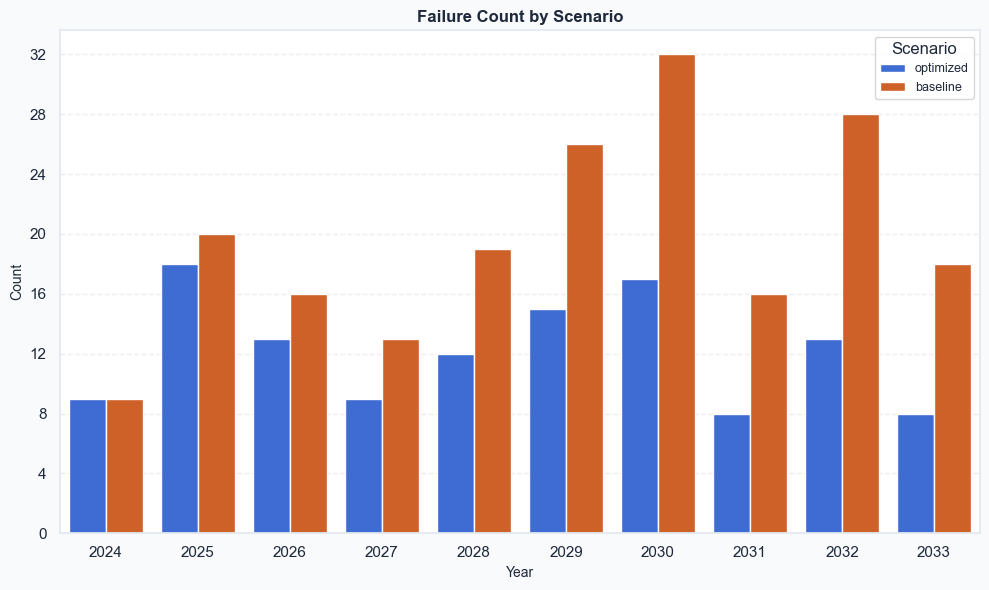

In [17]:
# Plot failure count comparison
ax = plot_scenario_comparison(comparison, metric='failure_count')
plt.show()

## 7. Asset Action Heatmap

Visualize asset actions across years using the asset history captured during simulation.


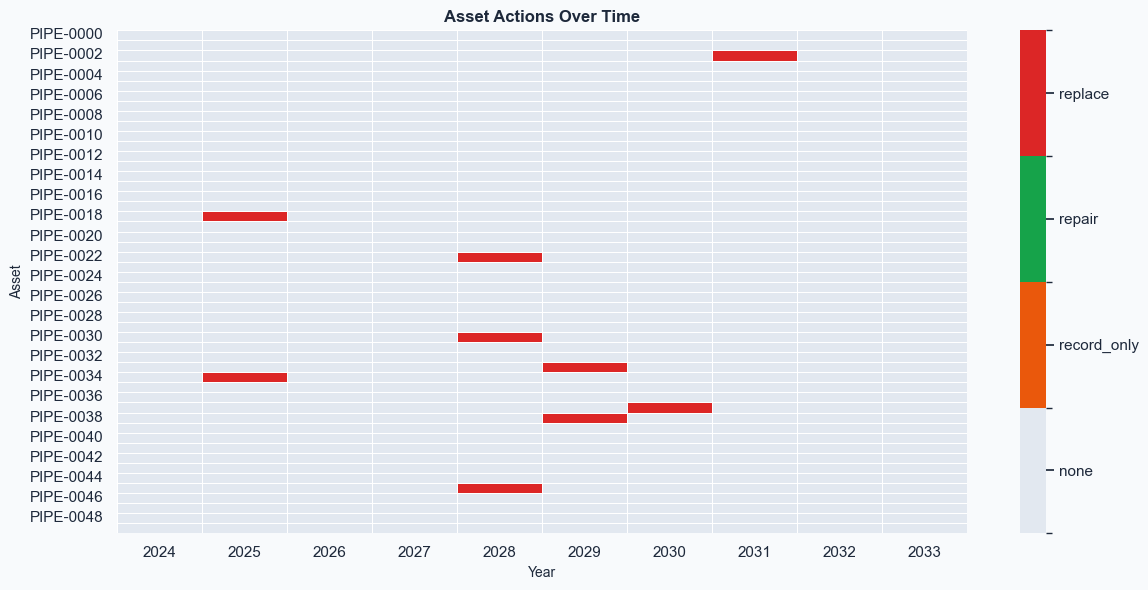

In [18]:
# Plot asset actions over time
ax = plot_asset_action_heatmap(sim_result, max_assets=50)
plt.show()


## 8. Customizing Charts

All plot functions return `matplotlib.axes.Axes` objects for further customization.

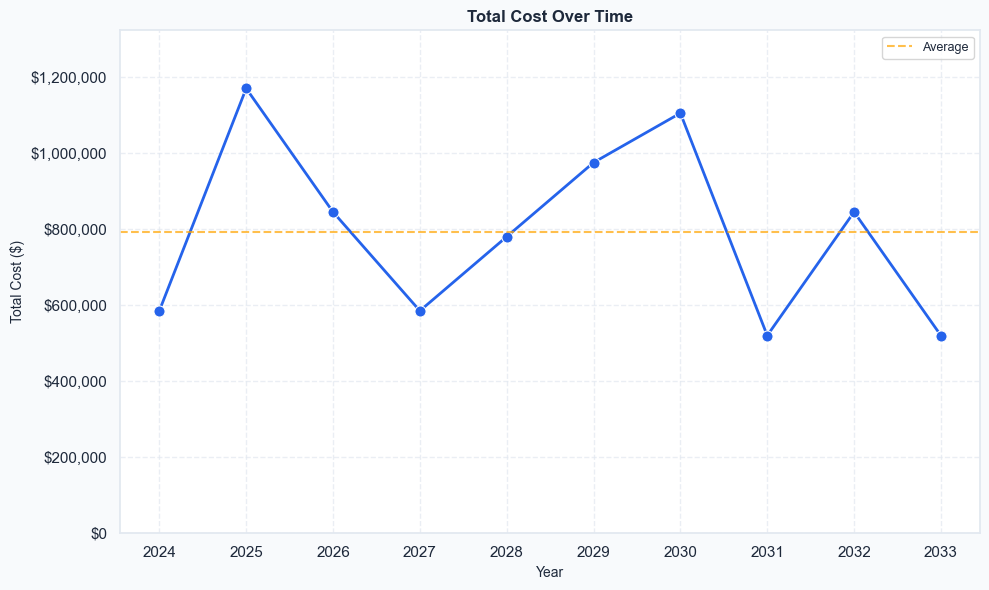

In [19]:
# Get axes and customize
ax = plot_cost_over_time(sim_result)

# Add annotations
ax.set_ylim(0, ax.get_ylim()[1] * 1.1)  # Add 10% headroom
ax.axhline(y=sim_result.summary['total_cost'].mean(), 
           color='orange', linestyle='--', alpha=0.7, 
           label='Average')
ax.legend()

plt.show()

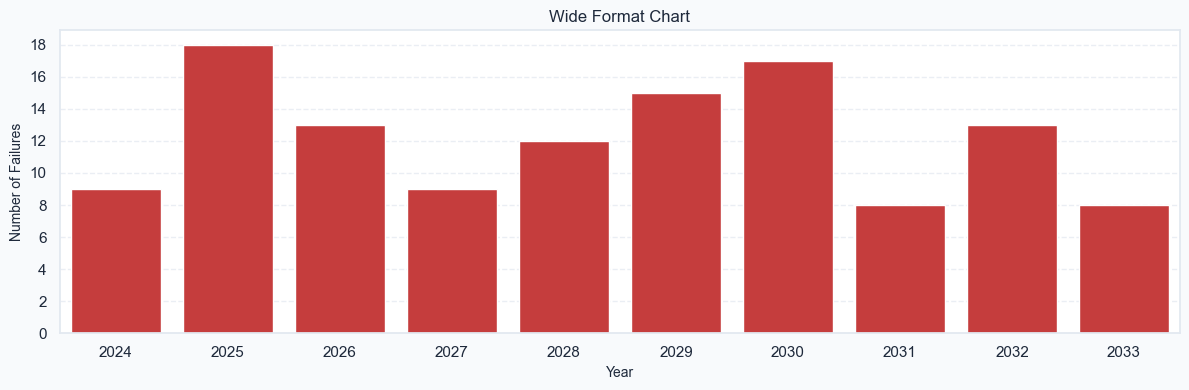

In [20]:
# Provide your own figure size
ax = plot_failures_by_year(sim_result, figsize=(12, 4))
ax.set_title('Wide Format Chart')
plt.show()

## 9. Exporting Results

### To Parquet

In [21]:
# Export simulation results
sim_result.to_parquet('sim_summary.parquet', format='summary')
sim_result.to_parquet('sim_projections.parquet', format='cost_projections')

# Export optimization results
opt_result.to_parquet('opt_schedule.parquet', format='minimal', year=2024)

print("Files exported:")
print("  - sim_summary.parquet")
print("  - sim_projections.parquet")
print("  - opt_schedule.parquet")

Files exported:
  - sim_summary.parquet
  - sim_projections.parquet
  - opt_schedule.parquet


### Reading Exports

In [22]:
# Read back parquet files
summary = pd.read_parquet('sim_summary.parquet')
print("Simulation Summary:")
summary

Simulation Summary:


,year,total_cost,failure_count,intervention_count,avg_age
0,2024,585000.0,9,9,49.747936
1,2025,1170000.0,18,18,48.533146
2,2026,845000.0,13,13,47.840893
3,2027,585000.0,9,9,47.656465
4,2028,780000.0,12,12,47.033057
5,2029,975000.0,15,15,45.950552
6,2030,1105000.0,17,17,44.688984
7,2031,520000.0,8,8,44.607035
8,2032,845000.0,13,13,43.811288
9,2033,520000.0,8,8,43.720134


In [23]:
# Long format is ready for seaborn/matplotlib
projections = pd.read_parquet('sim_projections.parquet')
print("Cost Projections (long format):")
projections.head(12)

Cost Projections (long format):


,year,metric,value
0,2024,total_cost,585000.0
1,2025,total_cost,1170000.0
2,2026,total_cost,845000.0
3,2027,total_cost,585000.0
4,2028,total_cost,780000.0
5,2029,total_cost,975000.0
6,2030,total_cost,1105000.0
7,2031,total_cost,520000.0
8,2032,total_cost,845000.0
9,2033,total_cost,520000.0


### Saving Charts

In [24]:
# Save chart to file
ax = plot_cost_over_time(sim_result)
plt.savefig('cost_chart.png', dpi=150, bbox_inches='tight')
print("Saved: cost_chart.png")
plt.close()

Saved: cost_chart.png


## 10. Creating Multi-Panel Figures

Combine multiple charts into a single figure for reports or dashboards.

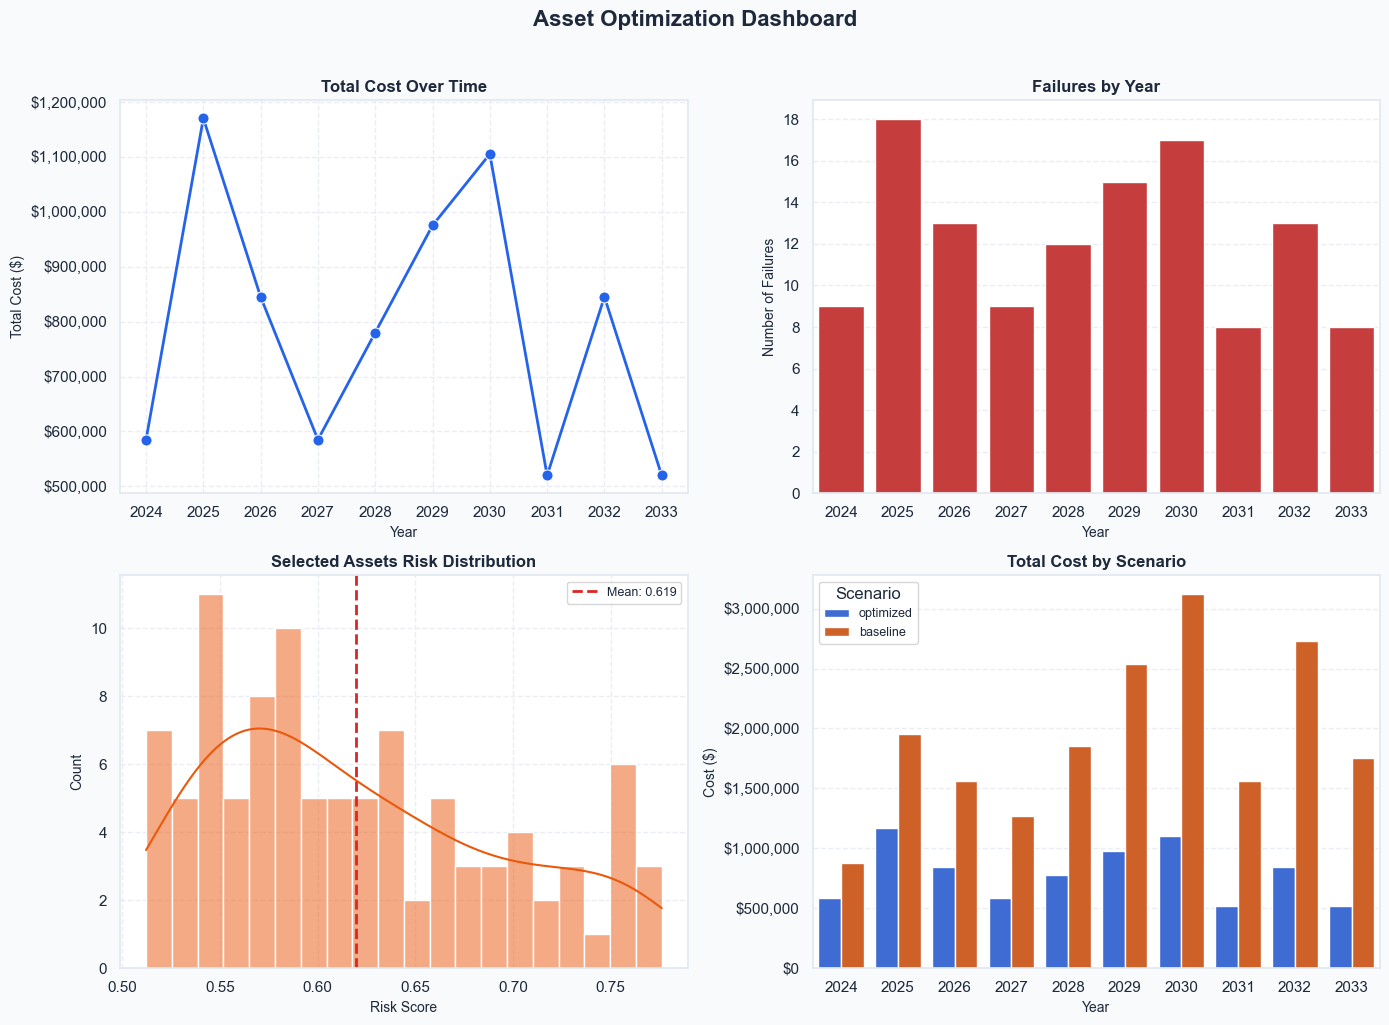

In [25]:
# Create 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top left: Cost over time
plot_cost_over_time(sim_result, ax=axes[0, 0], title='Total Cost Over Time')

# Top right: Failures by year
plot_failures_by_year(sim_result, ax=axes[0, 1], title='Failures by Year')

# Bottom left: Risk distribution
plot_risk_distribution(opt_result.selections, ax=axes[1, 0], title='Selected Assets Risk Distribution')

# Bottom right: Scenario comparison
plot_scenario_comparison(comparison, metric='total_cost', ax=axes[1, 1])

# Add overall title
fig.suptitle('Asset Optimization Dashboard', fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

In [26]:
# Save multi-panel figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

plot_cost_over_time(sim_result, ax=axes[0, 0])
plot_failures_by_year(sim_result, ax=axes[0, 1])
plot_risk_distribution(opt_result.selections, ax=axes[1, 0])
plot_scenario_comparison(comparison, metric='total_cost', ax=axes[1, 1])

fig.suptitle('Asset Optimization Dashboard', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

plt.savefig('dashboard.png', dpi=150, bbox_inches='tight')
print("Saved: dashboard.png")
plt.close()

Saved: dashboard.png


## Summary

This notebook covered the visualization and export capabilities:

1. **SDK Theme**: `set_sdk_theme()` for consistent styling
2. **Five Chart Types**:
   - `plot_cost_over_time()` - Line chart of costs
   - `plot_failures_by_year()` - Bar chart of failures
   - `plot_risk_distribution()` - Histogram of risk scores
   - `plot_scenario_comparison()` - Grouped bar chart for scenarios
   - `plot_asset_action_heatmap()` - Categorical heatmap of asset actions
3. **Customization**: All functions return axes for further customization
4. **Export**: Parquet format for data, PNG/PDF for charts
5. **Multi-Panel Figures**: Combine charts into dashboards

In [27]:
# Clean up temporary files
import os
for f in ['sim_summary.parquet', 'sim_projections.parquet', 
          'opt_schedule.parquet', 'cost_chart.png', 'dashboard.png']:
    if os.path.exists(f):
        os.remove(f)
        print(f"Cleaned up: {f}")

Cleaned up: sim_summary.parquet
Cleaned up: sim_projections.parquet
Cleaned up: opt_schedule.parquet
Cleaned up: cost_chart.png
Cleaned up: dashboard.png
